___
# Atividade: <p> <center> Propriedades de esperança e variância <p> <center> para Combinação linear de variáveis aleatórias
___

## Aula 17

**Objetivo da aula:** Ao final desta aula, o aluno deve ser capaz de:
 * Reconhecer variáveis aleatórias de interesse em um problema qualquer; e
 * Aplicar propriedades de esperança e variância quando se tem combinação linear entre variáveis aleatórias


___
<div id="indice"></div>

## Índice

- [Motivação teórica: estudo das f.d.p.'s](#motivacao)
    - [Exercício 1](#ex1)

<p> 
    
- [PROBLEMA: O que significa fazer $X+Y$?](#significa)

<p> 
    
- [SIMULAÇÃO: Programando valores para representar $X$, $Y$ e $X+Y$](#simulacao)
    - [Simulação com uso de *loop*](#simulacao1)
        - [Exercício 2 - Média e Variância via `numpy`](#ex2)
    - [Simulação sem uso de *loop* ](#simulacao2)
        - [Exercício 3 - Média e Variância via `pandas`](#ex3)

<p> 

- [TEORIA: Contrastando respostas utilizando as propriedades](#teoria)       
    - [Propriedades de esperança e variância em combinação linear de variáveis aleatórias](#propriedades)       
        - [Exercício 4 - Média e Variância via propriedades](#ex4)

<p>
    
- [Lista de comandos utilizados neste notebook](#comandos)
___

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

___
<div id="motivacao"></div>

# Motivação teórica: estudo das f.d.p.'s

A seguir, considere duas variáveis aleatórias $X$ e $Y$, ambas contínuas, cujo objetivo seja somá-las, ou seja, obter $X+Y$!

Vamos criar um experimento considerando as seguintes distribuições e parâmetros para $X$ e $Y$, respectivamente:

 $X \sim$ Uniforme$(4,7)$, ou seja, $a=4$ e $b=7$

e 

 $Y \sim$ Exponencial$(1/3)$, ou seja, $\lambda=1/3$ e $\mu=3$.

<div id="ex1"></div>

### EXERCÍCIO 1

Inicialmente, construa um gráfico de ambas as distribuições univariadamente. Veja **Aula 12** caso tenha dúvidas com essas duas distribuições.

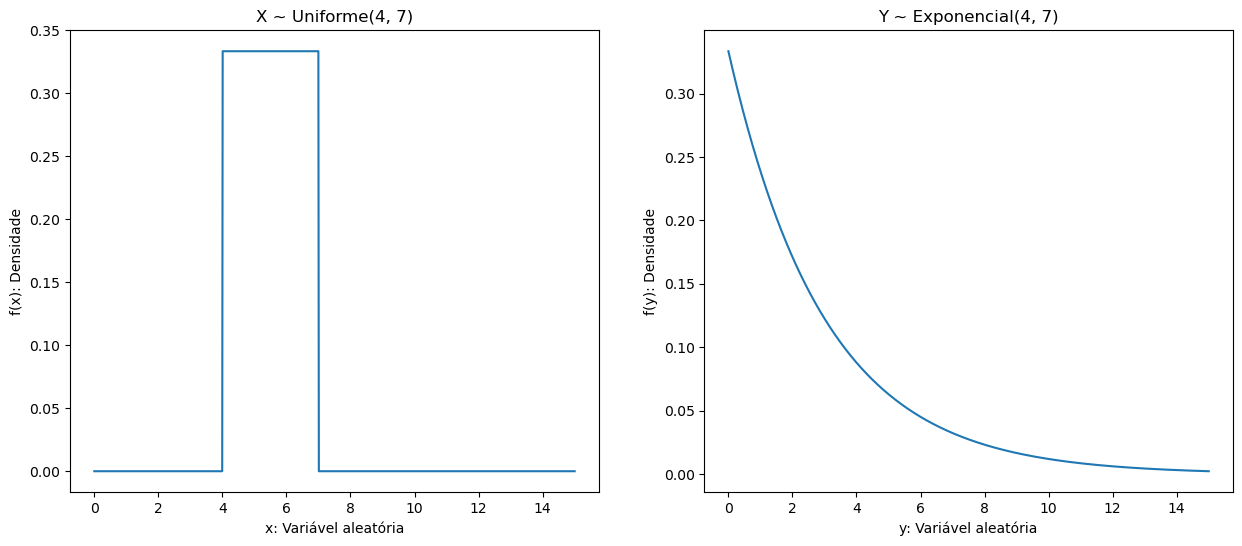

In [2]:
linha = np.linspace(0, 15, 1000)

Xa = 4
Xb = 7
f_x = stats.uniform.pdf(linha, loc=Xa, scale=Xb-Xa)


Ylamb = 1/3
mu = 3
f_y = stats.expon.pdf(linha, loc=0, scale=mu)  # scale: média || loc: valor de começo (quero que comece do 0)


plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(linha, f_x)
plt.xlabel('x: Variável aleatória')
plt.ylabel('f(x): Densidade')
plt.title('X ~ Uniforme(4, 7)')

plt.subplot(122)
plt.plot(linha, f_y)
plt.xlabel('y: Variável aleatória')
plt.ylabel('f(y): Densidade')
plt.title('Y ~ Exponencial(4, 7)')
plt.show()

___
<div id="significa"></div>

# PROBLEMA: O que significa fazer $X + Y$ ?

Considere, **por exemplo**, que um produto passe por duas etapas na linha de produção e o tempo em cada etapa seja mensurados. Assim, assuma que:

  * $X$ represente o tempo, em minutos, que um produto demora para passar pela etapa $1$; e
  * $Y$ represente o tempo, em minutos, que o mesmo produto demora para passar pela etapa $2$ na linha de produção.
  
Assim, $W=X+Y$ deverá representar o tempo total que um produto demora para ficar pronto se esse precisa apenas dessas duas etapas na linha de produção.

O que vamos entender agora é como podemos analisar o **valor esperado** e a **variância** de $W$ a partir de dados e depois considerando propriedades de esperança e variância.

___
<div id="simulacao"></div>

# SIMULAÇÃO: Programando valores para representar $X$, $Y$ e $X+Y$

Para estudarmos como ficaria o valor esperado e a variância de $W=X+Y$ a partir de dados, devemos simular alguns valores hipotéticos para representar $X$ conforme a uniforme e $Y$ conforme a exponencial mencionada acima. 

Para tanto, no `scipy.stats`, a função que gera uma amostra de valores conforme uma distribuição qualquer é a função `rvs()` (de *random variable sample*). No nosso exemplo, vamos utilizar `stats.uniform.rvs()` ou `stats.expon.rvs` com os valores dos parâmetros adequadamente aos citados anteriormente.

Assim, faremos:
  * Simular $n$ valores para construir uma amostra de $X$ utilizando a distribuição uniforme
  * Simular $n$ valores para construir uma amostra de $Y$ utilizando a distribuição exponencial
  * A cada linha, somar os valores de $x$ e de $y$ para construir a coluna $w$, já que $W = X + Y$

<div id="simulacao1"></div>

## Simulação com uso de *loop*:

Simulação mais "lenta" por fazer uso de `for`. Aqui, será simulado um valor por vez para $x$ e para $y$, calculado a soma e aguardado em $w$.

In [3]:
n = 50000

In [4]:
x_all = []
y_all = []
w_all = []

a = 4  #Início de valor da Uniforme
b = 7  #Final de valor da Uniforme
mu = 3 #Média da Exponencial

for i in range(n):
    x = stats.uniform.rvs(loc=a, scale=b-a) #rvs: random variable sample (gera valor aleatório a partir do modelo uniforme)
    y = stats.expon.rvs(scale=mu) #rvs: random variable sample (gera valor aleatório a partir do modelo exponencial)
    w = x+y
    
    # Guarda os n valores em lista
    x_all.append(x)
    y_all.append(y)
    w_all.append(w)

Dependendo das distribuições somadas, a nova distribuição resultante pode apresentar um outro formato. Ou seja, somar uma uniforme e uma exponencial, pode resultar numa terceira distribuição teórica que pode ou não ser facilmente conhecida na literatura estatística. 

Vamos visualizar o histograma dos valores de $x$, de $y$ e de $w$, esse último que deve indicar o formato da distribuição resultante.

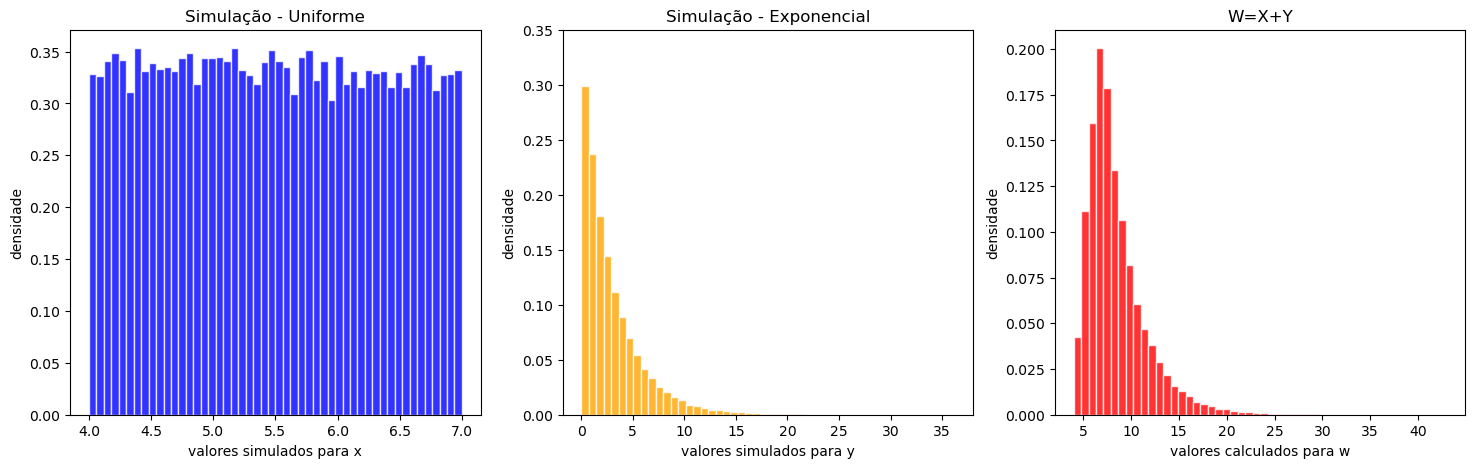

In [5]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.hist(x_all, bins=50, density=True,
         color='blue', edgecolor='white', 
         linewidth=1, alpha=0.8)
plt.ylabel('densidade')
plt.xlabel('valores simulados para x')
plt.title('Simulação - Uniforme')
#plt.ylim(0,0.35)

plt.subplot(132)
plt.hist(y_all, bins=50, density=True,
         color='orange', edgecolor='white', 
         linewidth=1, alpha=0.8)
plt.ylabel('densidade')
plt.xlabel('valores simulados para y')
plt.title('Simulação - Exponencial')
plt.ylim(0,0.35)

plt.subplot(133)
plt.hist(w_all, bins=50, density=True,
         color='red', edgecolor='white', 
         linewidth=1, alpha=0.8)
plt.ylabel('densidade')
plt.xlabel('valores calculados para w')
plt.title('W=X+Y')

plt.show()


**Pontos importantes:** 

Implementar $X+Y$ é somar os valores de $X$ com os valores de $Y$, linha a linha, e obter uma nova distribuição, cuja área também valerá $1$!!!

<div id="ex2"></div>

### EXERCÍCIO 2 - Média e Variância via `numpy`

Considerando os valores de `x_all`, `y_all` e `w_all`, calcule a média e variância de cada variável. Ainda, calcule covariância e correlação entre `x_all` e `y_all`.

In [6]:
media_x_all = np.mean(x_all)
media_y_all = np.mean(y_all)
media_w_all = np.mean(w_all)

print(f'Média x: {media_x_all:.3f}')
print(f'Média y: {media_y_all:.3f}')
print(f'Média w: {media_w_all:.3f}')

Média x: 5.492
Média y: 2.978
Média w: 8.469


In [7]:
var_x_all = np.var(x_all)
var_y_all = np.var(y_all)
var_w_all = np.var(w_all)

print(f'Variância x: {var_x_all:.3f}')
print(f'Variância y: {var_y_all:.3f}')
print(f'Variância w: {var_w_all:.3f}')

Variância x: 0.747
Variância y: 8.957
Variância w: 9.690


In [8]:
cov_x_y = np.cov(x_all, y_all)[0][1]
corr_x_y = np.corrcoef(x_all, y_all)[0][1]

print(f'Covariância entre x e y: {cov_x_y:.5f}')
print(f'Correlação entre x e y: {corr_x_y:.5f}')


Covariância entre x e y: -0.00687
Correlação entre x e y: -0.00266


___

<div id="simulacao2"></div>

## Simulação sem uso de *loop*:

Agora, ao invés de fazer um *loop* para gerar $n$ amostras em Python, podemos pedir à função `rvs()` que realize $n$ sorteios diretamente utilizando o **argumento** `size = n`. 

Observe que os resultados gerados aqui não se alteram, de maneira geral, mas o desempenho é melhor (mais rápido).

In [9]:
x_All = stats.uniform.rvs(loc=a, scale=b-a, size=n)
y_All = stats.expon.rvs(scale=mu, size=n)

# note que estamos somando elemento a elemento de x_All e y_All e obtendo um novo array
w_All = x_All + y_All 

<div id="ex3"></div>

### EXERCÍCIO 3 - Média e Variância via `pandas`

Os valores de `x_All`, `y_All` e `w_All`, a seguir, serão colocados em um *dataframe* chamando `df`.

Considerando as variáveis `X`, `Y` e `W` desse *dataframe*, calcule a média e variância de cada variável. Ainda, calcule covariância e correlação entre `X` e `Y`.

Faça todas as contas utilizando comando do *pandas*.


In [10]:
df = pd.DataFrame()
df['X'] = x_All
df['Y'] = y_All
df['W'] = w_All
df.head()

,X,Y,W
0,5.475617,0.351623,5.827240
1,5.605085,10.471217,16.076302
2,4.300346,0.934247,5.234593
3,6.419722,2.461080,8.880802
4,5.205801,4.860308,10.066108


In [11]:
print(f"X: Média = {df['X'].mean():.3f} | Variância = {df['X'].var():.3f}")
print(f"Y: Média = {df['Y'].mean():.3f} | Variância = {df['Y'].var():.3f}")
print(f"W: Média = {df['W'].mean():.3f} | Variância = {df['W'].var():.3f}")

X: Média = 5.495 | Variância = 0.750
Y: Média = 3.008 | Variância = 9.088
W: Média = 8.503 | Variância = 9.864


In [12]:
print(f"Covariância entre x e y: {df['X'].cov(df['Y']):.5f}")
print(f"Correlação entre x e y: {df['X'].corr(df['Y']):.5f}")

Covariância entre x e y: 0.01277
Correlação entre x e y: 0.00489


___
<div id="teoria"></div>


# TEORIA: Contrastando respostas utilizando as propriedades

Dica: Reveja as aulas de **modelos probabilísticos contínuos** - uniforme e exponencial

Relembrando:

### Para a Uniforme:

Utilizando o resultado teórico da distribuição Uniforme, temos que o valor esperado é dado por:

$$E(X) = \frac{a + b}{2} = 5.5$$

Já a variância de uma variável com distribuição Uniforme é dada por:

$$Var(X) = \frac{(b-a)^2}{12} = 0.75$$


### Para a exponencial:

Utilizando o resultado teórica da distribuição Exponencial, temos que o valor esperado é dado por:

$$E(Y) = \mu = 3$$

Já a variância de uma variável com distribuição Exponencial é dada por:

$$Var(Y) = \mu^2 = 9$$

___
<div id="propriedades"></div>

## Propriedades de esperança e variância em combinação linear de variáveis aleatórias


### E(W): Valor esperado da W calculada a partir da teoria

**Previsão teórica:**

**$\qquad E(W) = E(X)  + E(Y)$**

$\quad$

### Var(W): Variância da W calculada a partir da teoria

**Previsão teórica:**

**$\qquad Var(W) = Var(X) + Var(Y) + 2 * Cov(X,Y)$**

$\quad$

Assuma que as variáveis $X$ e $Y$ são **INDEPENDENTES** até mesmo pela maneira que foram geradas.



<div id="ex4"></div>

### EXERCÍCIO 4 - Média e Variância via propriedades

Considerando os resultados teóricos para $E(X)$, $E(Y)$, $Var(X)$, $Var(Y)$ e $Cov(X,Y)$, calcule o valor esperado e a variância de $W$. 

Compare os valores obtidos para $E(W)$ e $Var(W)$ com os obtidos nos exercícios [Exercício 2](#ex2) e [Exercício 3](#ex3).


In [13]:
E_x = 5.5
E_y = 3

Var_x = 0.75
Var_y = 9

E_w = E_x + E_y
Var_w = Var_x + Var_y + (2 * np.cov(x_all, y_all)[0][1])

print(f"W: Esperança = {E_w:.5f} | Variância = {Var_w:.5f}")

W: Esperança = 8.50000 | Variância = 9.73625


Comparando os resultados SIMULADOS com os calculados por PROPRIEDADES:

___
<div id="comandos"></div>

## Lista de comandos utilizados neste notebook

Coloque aqui a lista de novos comandos deste notebook:

 * 
 